## INTRODUCTION
IMDb (Internet Movie Database) is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, fan and critical reviews, and ratings.We here tried to implement M.L model on this data to understand sentiments of the comment whether it's positive or negative

### There are three columns in the movie review dataset:
Id <br>
Review <br>
Sentiment <br>

### This project explores the applicability of machine learning based classification techniques:
Logistic Regression<br>
Decision Tree<br>
Random Forest<br>
Gaussian Naïve Bayes & Multinomial Naïve Bayes<br>
K-Nearest Neighbor<br>
SMV – Support Vector Machine<br>
We are going to determine that feature selection improves the performance of sentiment based classification, but it depends on the method adopted and the number of feature selected.Here we will find optimal model and techniques to apply so that we get an accurate prediction system

In [1]:
# Import libraries: pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Here i am gonna read the csv file and display it
data =pd.read_csv("movie_review.csv",sep="\t",encoding="latin-1")
data

,id,review,sentiment
0,5814_8,With all this stuff going down at the moment w...,1
1,2381_9,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,7759_3,The film starts with a manager (Nicholas Bell)...,0
3,3630_4,It must be assumed that those who praised this...,0
4,9495_8,Superbly trashy and wondrously unpretentious 8...,1
...,...,...,...
22495,3453_3,It seems like more consideration has gone into...,0
22496,5064_1,I don't believe they made this film. Completel...,0
22497,10905_3,"Guy is a loser. Can't get girls, needs to buil...",0
22498,10194_3,This 30 minute documentary BuÃÂ±uel made in t...,0


#### exploring data 

In [3]:
data.shape

(22500, 3)

In [4]:
data.info

<bound method DataFrame.info of             id                                             review  sentiment
0       5814_8  With all this stuff going down at the moment w...          1
1       2381_9  \The Classic War of the Worlds\" by Timothy Hi...          1
2       7759_3  The film starts with a manager (Nicholas Bell)...          0
3       3630_4  It must be assumed that those who praised this...          0
4       9495_8  Superbly trashy and wondrously unpretentious 8...          1
...        ...                                                ...        ...
22495   3453_3  It seems like more consideration has gone into...          0
22496   5064_1  I don't believe they made this film. Completel...          0
22497  10905_3  Guy is a loser. Can't get girls, needs to buil...          0
22498  10194_3  This 30 minute documentary BuÃÂ±uel made in t...          0
22499   8478_8  I saw this movie as a child and it broke my he...          1

[22500 rows x 3 columns]>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         22500 non-null  object
 1   review     22500 non-null  object
 2   sentiment  22500 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 527.5+ KB


In [6]:
data["sentiment"].value_counts()# 1 is positive and 0 is negative

1    11278
0    11222
Name: sentiment, dtype: int64

Text(0, 0.5, 'number of reviews')

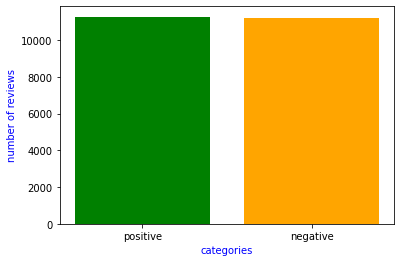

In [7]:
plt.bar(["positive","negative"],data["sentiment"].value_counts(),color=["green","orange"])
plt.xlabel("categories",fontdict={"fontsize":10,"fontweight":10,"color":"Blue"})
plt.ylabel("number of reviews",fontdict={"fontsize":10,"fontweight":10,"color":"Blue"})

In [8]:
data.describe()

,sentiment
count,22500.000000
mean,0.501244
std,0.500010
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
data.head()

,id,review,sentiment
0,5814_8,With all this stuff going down at the moment w...,1
1,2381_9,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,7759_3,The film starts with a manager (Nicholas Bell)...,0
3,3630_4,It must be assumed that those who praised this...,0
4,9495_8,Superbly trashy and wondrously unpretentious 8...,1


In [10]:
df=data.drop("id",axis="columns")
df

,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,The film starts with a manager (Nicholas Bell)...,0
3,It must be assumed that those who praised this...,0
4,Superbly trashy and wondrously unpretentious 8...,1
...,...,...
22495,It seems like more consideration has gone into...,0
22496,I don't believe they made this film. Completel...,0
22497,"Guy is a loser. Can't get girls, needs to buil...",0
22498,This 30 minute documentary BuÃÂ±uel made in t...,0


### Data cleaning and preprocessing

In [11]:
df.index

RangeIndex(start=0, stop=22500, step=1)

In [12]:
data["review"].mode()# chcking repetive value for ambiguity

0    How has this piece of crap stayed on TV this l...
1    This show comes up with interesting locations ...
2    When i got this movie free from my job, along ...
dtype: object

In [13]:
data["review"].mode().count()

3

In [14]:
data["review"].mode()[0]

"How has this piece of crap stayed on TV this long? It's terrible. It makes me want to shoot someone. It's so fake that it is actually worse than a 1940s sci-fi movie. I'd rather have a stroke than watch this nonsense. I remember watching it when it first came out. I thought, hey this could be interesting, then I found out how absolutely, insanely, ridiculously stupid it really was. It was so bad that I actually took out my pocket knife and stuck my hand to the table.<br /><br />Please people, stop watching this and all other reality shows, they're the trash that is jamming the networks and canceling quality programming that requires some thought to create."

In [15]:
data[data["review"]==data["review"].mode()[0]]

,id,review,sentiment
6979,5551_1,How has this piece of crap stayed on TV this l...,0
8788,5953_1,How has this piece of crap stayed on TV this l...,0
20050,11975_1,How has this piece of crap stayed on TV this l...,0


In [16]:
data[data["review"]==data["review"].mode()[1]]

,id,review,sentiment
13759,5552_1,This show comes up with interesting locations ...,0
15972,11976_1,This show comes up with interesting locations ...,0
16248,5954_1,This show comes up with interesting locations ...,0


In [17]:
data[data["review"]==data["review"].mode()[2]]

,id,review,sentiment
4478,12395_4,"When i got this movie free from my job, along ...",0
6218,12393_4,"When i got this movie free from my job, along ...",0
6843,12394_4,"When i got this movie free from my job, along ...",0


In [18]:
#since all repeated sentence doesn't have any ambigous ans so we  don't need to remove them
# checking for null values

In [19]:
df.isna().count()

review       22500
sentiment    22500
dtype: int64

In [20]:
df

,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,The film starts with a manager (Nicholas Bell)...,0
3,It must be assumed that those who praised this...,0
4,Superbly trashy and wondrously unpretentious 8...,1
...,...,...
22495,It seems like more consideration has gone into...,0
22496,I don't believe they made this film. Completel...,0
22497,"Guy is a loser. Can't get girls, needs to buil...",0
22498,This 30 minute documentary BuÃÂ±uel made in t...,0


In [21]:
df[df["sentiment"]==1]

,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
4,Superbly trashy and wondrously unpretentious 8...,1
5,I dont know why people think this is such a ba...,1
8,<br /><br />This movie is full of references. ...,1
...,...,...
22487,"Last November, I had a chance to see this film...",1
22488,While originally reluctant to jump on the band...,1
22489,I heard about this movie when watching VH1's \...,1
22490,I've never been huge on IMAX films. They're co...,1


In [22]:
def preprocesso(text):
    import re
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

##### preproceesing technique used count vectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
from sklearn import model_selection

In [25]:
vectorizer=CountVectorizer(preprocessor=preprocesso)

In [27]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(df.review,df.sentiment,test_size=0.3)

In [28]:
X_train=vectorizer.fit_transform(x_train)

In [29]:
X_train

<15750x63411 sparse matrix of type '<class 'numpy.int64'>'
	with 2162934 stored elements in Compressed Sparse Row format>

In [30]:
X_train=X_train.toarray()

In [31]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
dftrain=pd.DataFrame(X_train,columns=vectorizer.get_feature_names())

C:\Users\sanam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
dftrain

,00,000,00001,00015,000s,001,006,007,0080,0083,...,â¼renberg,â¼rer,â¼rgen,â¼rgermeister,â¼ri,â¼rmann,â¼te,â½,â½th,â¾
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15747,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 3: Classification
#### We train our algorithm by several models


##### Logistic Regression

In [45]:
# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression()

# clf.fit(X_train, y_train)
# # it was taking to much of time

KeyboardInterrupt: 

In [36]:
# from nltk.stem import PorterStemmer

# porter = PorterStemmer()

# def tokenizer_porter(text):
#     token = []
#     for word in text.split():
#         token.append(porter.stem(word))
    
#     return token

In [37]:
# Step 2: Representation

In [38]:
# from sklearn.feature_extraction import text 
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.corpus import stopwords
# import nltk

# from sklearn.model_selection import train_test_split

# X = df['review'] 
# y = df['sentiment']

# my_additional_stop_words = []

# stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

# tfidf = TfidfVectorizer(stop_words=stop,
#                         tokenizer=tokenizer_porter,
#                         preprocessor=preprocesso)

# X_tfidf = tfidf.fit_transform(X)

# # split the dataset in train and test
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state = 101)

##### here i noted data is taking to much of time so random sampling

In [34]:
df_subset = df.sample (n=2300)

In [35]:
df_subset

,review,sentiment
12870,"I am a Shakespeare fan, and I can appreciate w...",0
717,"Of the many problems with this film, the worst...",0
2497,I think this is what this movie wants us to sa...,1
15739,"Upon the first viewing, I found this tale to b...",1
1775,I have been a fan of Pushing Daisies since the...,1
...,...,...
723,Usually I love Lesbian movies even when they a...,0
9916,That's a snippet of choice dialogue delivered ...,0
11461,Anyone who thinks this film has not been appre...,0
7261,It is difficult to find any positives in this ...,0


In [36]:
df_subset.describe()

,sentiment
count,2300.000000
mean,0.516087
std,0.499850
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [37]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 12870 to 16675
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2300 non-null   object
 1   sentiment  2300 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 53.9+ KB


In [38]:
df_subset["sentiment"].value_counts()

1    1187
0    1113
Name: sentiment, dtype: int64

In [39]:
vectorizer=CountVectorizer(preprocessor=preprocesso)

In [40]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(df_subset.review,df_subset.sentiment,test_size=0.3)

In [41]:
X_train=vectorizer.fit_transform(x_train)

In [42]:
#a=vec.transform(np.array(["it's a great movie"]))   
vectorizer.transform(["it's a great movie"])

<1x22575 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [43]:
X_train

<1610x22575 sparse matrix of type '<class 'numpy.int64'>'
	with 216949 stored elements in Compressed Sparse Row format>

In [44]:
X_train=X_train.toarray()

In [45]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
subtrain=pd.DataFrame(X_train,columns=vectorizer.get_feature_names())

C:\Users\sanam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
subtrain

,00,000,007,00am,00pm,01,02,03,05,06,...,zuniga,zwick,zzzzzzzzzzzzz,âªt,â³,â³ir,â³n,â³nica,â¼diger,â¼rgen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)


C:\Users\sanam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
print(y_train.shape,X_train.shape,x_test.shape,y_test.shape)


(1610,) (1610, 22575) (690,) (690,)


In [51]:
X_test=vectorizer.transform(x_test)

In [52]:
X_test.shape

(690, 22575)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
predictions = clf.predict(X_test)

# print('The accuracy score is:',accuracy_score(y_test,predictions))
# print('The confusion matrix is:','\n',confusion_matrix(y_test,predictions))
# print('The classification report is:','\n',classification_report(y_test,predictions))

In [82]:
predictions

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,

In [83]:
len(predictions)

690

#### evaluation of model

In [84]:
print('The accuracy score is:',accuracy_score(y_test,predictions))

The accuracy score is: 0.8014492753623188


In [85]:
print('The confusion matrix is:','\n',confusion_matrix(y_test,predictions))
print('The classification report is:','\n',classification_report(y_test,predictions))

The confusion matrix is: 
 [[300  65]
 [ 72 253]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       365
           1       0.80      0.78      0.79       325

    accuracy                           0.80       690
   macro avg       0.80      0.80      0.80       690
weighted avg       0.80      0.80      0.80       690



<AxesSubplot:>

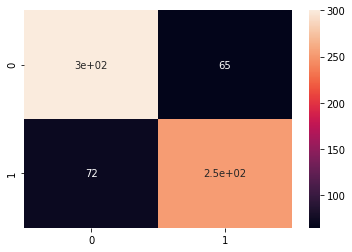

In [86]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

##### Decision tree implementation

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
dtc_predictions = dtc.predict(X_test)

In [89]:
cm=confusion_matrix(y_test,dtc_predictions)
print('The accuracy score is:',accuracy_score(y_test,dtc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,dtc_predictions))
print('The classification report is:','\n',classification_report(y_test,dtc_predictions))

The accuracy score is: 0.6579710144927536
The confusion matrix is: 
 [[239 126]
 [110 215]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.68      0.65      0.67       365
           1       0.63      0.66      0.65       325

    accuracy                           0.66       690
   macro avg       0.66      0.66      0.66       690
weighted avg       0.66      0.66      0.66       690



<AxesSubplot:>

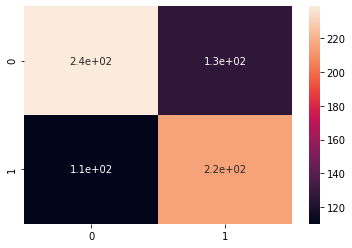

In [90]:
sns.heatmap(cm,annot=True)

##### random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
rfc_predictions = rfc.predict(X_test)

In [56]:
print('The accuracy score is:',accuracy_score(y_test,rfc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,rfc_predictions))
print('The classification report is:','\n',classification_report(y_test,rfc_predictions))

The accuracy score is: 0.8144927536231884
The confusion matrix is: 
 [[254  87]
 [ 41 308]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.86      0.74      0.80       341
           1       0.78      0.88      0.83       349

    accuracy                           0.81       690
   macro avg       0.82      0.81      0.81       690
weighted avg       0.82      0.81      0.81       690



<AxesSubplot:>

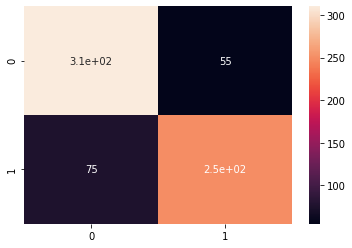

In [94]:
sns.heatmap(confusion_matrix(y_test,rfc_predictions),annot=True)

[0.5850970936750141, 0.6670847346137099, 0.6900402549635435, 0.730439978876567, 0.7291741942058794, 0.7583810463511123, 0.7732855739922361, 0.7894304084790201, 0.7875740015008755, 0.8093089024152978]


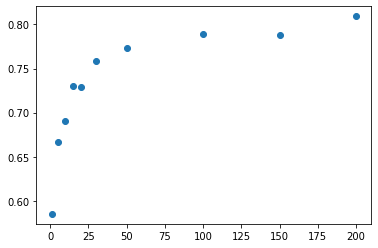

In [57]:
#K-fold cross validation should be used to tune the model
from sklearn.model_selection import cross_val_score

n = [1 ,5 ,10, 15, 20, 30, 50, 100, 150,200]
val_results = []

for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    val_results.append(cross_val_score(clf, X_train, y_train,cv=3).mean())#cv = k's and no. of train test types maintained
    
plt.scatter(n, val_results)
print(val_results)

In [58]:
final_rfc = RandomForestClassifier(n_estimators=200)

final_rfc.fit(X_train, y_train)
final_predictions = final_rfc.predict(X_test)

In [59]:
print('The accuracy score is:',accuracy_score(y_test,final_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,final_predictions))
print('The classification report is:','\n',classification_report(y_test,final_predictions))

The accuracy score is: 0.8260869565217391
The confusion matrix is: 
 [[261  80]
 [ 40 309]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.87      0.77      0.81       341
           1       0.79      0.89      0.84       349

    accuracy                           0.83       690
   macro avg       0.83      0.83      0.83       690
weighted avg       0.83      0.83      0.83       690



<AxesSubplot:>

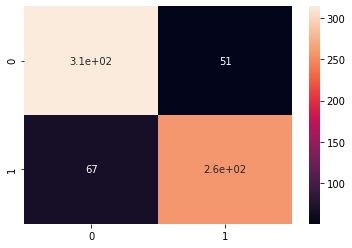

In [99]:
sns.heatmap(confusion_matrix(y_test,final_predictions),annot=True)

#### Naive bayes

In [100]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = MultinomialNB()

gnb.fit(X_train, y_train)

gnb_predictions = gnb.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,gnb_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,gnb_predictions))
print('The classification report is:','\n',classification_report(y_test,gnb_predictions))

The accuracy score is: 0.8043478260869565
The confusion matrix is: 
 [[311  54]
 [ 81 244]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       365
           1       0.82      0.75      0.78       325

    accuracy                           0.80       690
   macro avg       0.81      0.80      0.80       690
weighted avg       0.81      0.80      0.80       690



##### KNN

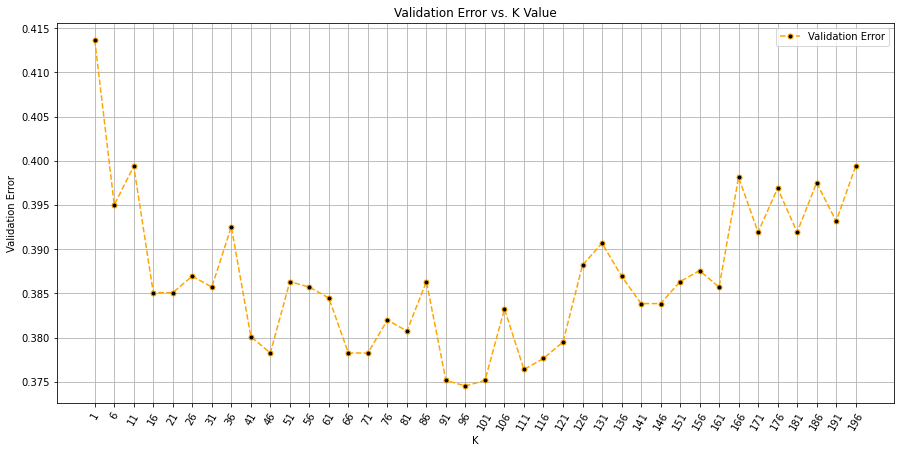

In [101]:
from sklearn.neighbors import KNeighborsClassifier
### Tuning using K-fold Cross Validation

from sklearn.model_selection import cross_val_score

val_error_rate = []
neighbors_range = range(1,200,5)

for i in neighbors_range:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    val_error = 1 - cross_val_score(knn, X_train, y_train,cv=5).mean()
    val_error_rate.append(val_error)

# Plot settings
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')
plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

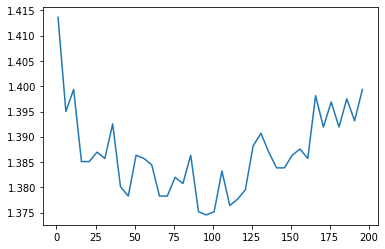

In [104]:
plt.plot(neighbors_range,np.array(val_error_rate)+1)
plt.show

In [105]:
best_k = neighbors_range[val_error_rate.index(min(val_error_rate))]
best_k

96

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=96)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,knn_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,knn_predictions))
print('The classification report is:','\n',classification_report(y_test,knn_predictions))

The accuracy score is: 0.644927536231884
The confusion matrix is: 
 [[220 145]
 [100 225]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.69      0.60      0.64       365
           1       0.61      0.69      0.65       325

    accuracy                           0.64       690
   macro avg       0.65      0.65      0.64       690
weighted avg       0.65      0.64      0.64       690



##### svm

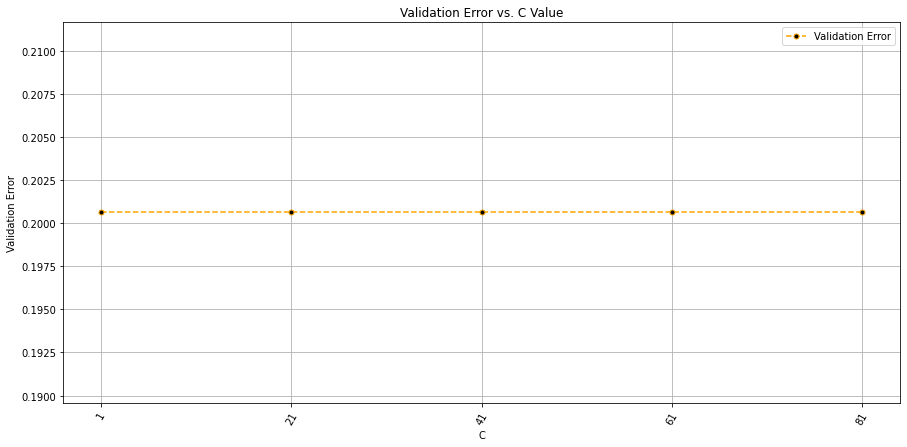

In [107]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

val_rate = []
c_range =  range(1,100,20)

for i in c_range:
    
    svm = SVC(C=i, kernel='linear')
    
    val_error = 1 - cross_val_score(svm, X_train, y_train,cv=3).mean()
    val_rate.append(val_error)


# Plot settings
plt.figure(figsize=(15,7))
plt.plot(c_range, val_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')

plt.xticks(np.arange(c_range.start, c_range.stop, c_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. C Value')
plt.xlabel('C')
plt.ylabel('Validation Error')
plt.show()

In [108]:
best_c = c_range[val_rate.index(min(val_rate))]
best_c

1

In [109]:
svm = SVC(kernel='linear',C=1).fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [110]:
pred = svm.predict(X_test.toarray())
print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))


The accuracy score is: 0.8028985507246377
The confusion matrix is: 
 [[296  69]
 [ 67 258]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       365
           1       0.79      0.79      0.79       325

    accuracy                           0.80       690
   macro avg       0.80      0.80      0.80       690
weighted avg       0.80      0.80      0.80       690



In [111]:
svm = SVC(kernel='linear',C=3).fit(X_train, y_train)
svm.fit(X_train, y_train)
SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
pred = svm.predict(X_test.toarray())
print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))

The accuracy score is: 0.8028985507246377
The confusion matrix is: 
 [[296  69]
 [ 67 258]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       365
           1       0.79      0.79      0.79       325

    accuracy                           0.80       690
   macro avg       0.80      0.80      0.80       690
weighted avg       0.80      0.80      0.80       690



## Feature selection

In [112]:
X_train.shape

(1610, 22887)

In [114]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import VarianceThreshold

# Reshape X_train, X_test by fit_transform
X_new_train = SelectKBest(chi2, k=13000).fit_transform(X_train, y_train)
X_new_test = SelectKBest(chi2, k=13000).fit_transform(X_test, y_test)

# Build Logistic Regression Model and check accuracy
clf.fit(X_new_train, y_train)

new_predictions = clf.predict(X_new_test)

print('The accuracy score is:',accuracy_score(y_test,new_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,new_predictions))
print('The classification report is:','\n',classification_report(y_test,new_predictions))

The accuracy score is: 0.5318840579710145
The confusion matrix is: 
 [[100 265]
 [ 58 267]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.63      0.27      0.38       365
           1       0.50      0.82      0.62       325

    accuracy                           0.53       690
   macro avg       0.57      0.55      0.50       690
weighted avg       0.57      0.53      0.50       690



In [116]:
#since selecting best features is just reducing accuracy of models so no need 

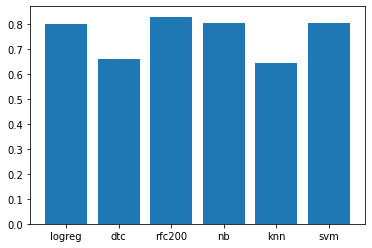

In [119]:
plt.bar(["logreg","dtc","rfc200","nb","knn","svm"],[0.8014492753623188,0.6579710144927536,0.8289855072463768, 0.8043478260869565,0.644927536231884,0.8028985507246377])
plt.show()

In [120]:
#random forest classifier with 200 estimators comes out to be best

#### saving model

In [60]:
import joblib
joblib.dump(final_rfc, 'revfrfcmodel_joblib')

['revfrfcmodel_joblib']

In [61]:
mj = joblib.load('revfrfcmodel_joblib')

In [62]:
mj.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [69]:
import mysql.connector
con=mysql.connector.connect(host="localhost",database="movie rev",user="root",password="")
mycur=con.cursor()
from tkinter import *
from tkinter import ttk
import numpy as np
from tkinter import messagebox
import joblib
mj = joblib.load('revfrfcmodel_joblib')
# b=vectorizer.transform(np.array(['it was good']))
# print(mj.predict(a))

root = Tk()
root.title('Imdb sentiment analysis')
root.geometry('700x700')
root.configure(bg="#FAC213")
root.iconbitmap(r'logo128.ico')
def page():
    second= Toplevel()
    second.title("Imdb sentiment analysis")
    second.configure(bg="#FAC213")
    second.iconbitmap(r'logo128.ico')
    
         #Review tab

    textonreview =Label(second,width=60,height=2,text= "Enter movie name",font=("Times New Roman",25),bg='#FAC213')

    textonreview.pack()

    entryonreview=Entry(second,width=60,borderwidth=5)
    entryonreview.pack(pady=10)

    textonreview2 =Label(second,width=60,height=2,text= "Enter review",bg='#FAC213',font=("Times New Roman",25))

    textonreview2.pack(pady=10)

    entryonreview2=Text(second,width=60,height= 10,font=("Times New Roman",12))
    entryonreview2.pack(pady=10)

    textonreview3 =Label(second,width=60,height=2,text= "select category",bg='#FAC213',font=("Times New Roman",25))

    textonreview3.pack(pady=10)
    
    def valget():
        third= Toplevel()
        third.title("Imdb sentiment analysis")
        third.geometry('700x700')
        third.configure(bg="#FAC213")
        third.iconbitmap(r'logo128.ico')
        if len(entryonreview2.get(1.0,END))>50:
            textonthird =Label(third,width=60,height=2,text= "Your review is",font=("Times New Roman",35),bg='#FAC213')

            textonthird.pack()
            a=[]
            a.append(entryonreview.get())
            a.append(entryonreview2.get(1.0,END))
            a.append(clicked.get())
            print(a)
            b=vectorizer.transform(np.array([a[1]]))
            c=mj.predict(b)
            if c[0]==1:
                res=Label(third,text='positive',width=60,height=2,font=("Times New Roman",35),fg='green',bg='#FAC213').pack(pady=100)
            else:
                 res=Label(third,text='negative',width=60,height=2,font=("Times New Roman",35),fg='red',bg='#FAC213').pack(pady=100)
            cmd="INSERT INTO newrev(review,movie,category,ans) VALUES(%s,%s,%s,%s)"
            val=(a[1],a[0],a[2],int(c[0]))
            mycur.execute(cmd,val)
            con.commit()
        else:
            response=messagebox.showerror('invalid review','please enter valid review')
            

            return True
    def result(n):
        return True
    clicked=StringVar()
    clicked.set("Thriller")


    options =OptionMenu(second,clicked, 'Thriller','Comedy','Action','Horror',command=result)
    options.pack()


    
    buttononreview=Button(second,text="Get result",font=("Times New Roman",25),command=valget)
    buttononreview.pack(pady=50)


     
start=Label(text="IMDB SENTIMENT ANALYSIS",font=("Times New Roman",35),bg='#FAC213').pack(pady=100)
startbutton=Button(text="START",font=("Times New Roman",25),command=page).pack(pady=100)






root.mainloop()

['sameergewd', "I saw this film yesterday. I must admit, it weren't my cup of tea. Although it's supposed to be a horror movie of its kind. But as I was watching this, I was thinking.. 'This movie isn't making any sense at all..' Where on earth did this guy in the dark coat came from? Where were the two guys were going when they left the girls behind? Where on earth did a shark came out from?<br /><br />All these elements in this film somehow didn't add up. I felt as if these filmmakers wasted so much time and money on a film that was so bound to be so crap.<br /><br />I've seen many good horror movies in my time, but this is one of the most worst horror flicks I've seen. At the end of the movie, I said to myself that I wouldn't watch it again.. So much pappy show in this film, I've decided to give it the thumbs down! Count me out on this one! 0 out of 10\n", 'Comedy']


In [137]:
a=x_test[y_test==0]

In [141]:
a[16895]

"I saw this film yesterday. I must admit, it weren't my cup of tea. Although it's supposed to be a horror movie of its kind. But as I was watching this, I was thinking.. 'This movie isn't making any sense at all..' Where on earth did this guy in the dark coat came from? Where were the two guys were going when they left the girls behind? Where on earth did a shark came out from?<br /><br />All these elements in this film somehow didn't add up. I felt as if these filmmakers wasted so much time and money on a film that was so bound to be so crap.<br /><br />I've seen many good horror movies in my time, but this is one of the most worst horror flicks I've seen. At the end of the movie, I said to myself that I wouldn't watch it again.. So much pappy show in this film, I've decided to give it the thumbs down! Count me out on this one! 0 out of 10!"

In [156]:
len(a[16895])

852

In [68]:
a=x_test[y_test==0]

In [76]:
a


12179    This film had no huge stars in it, but did hav...
20658    The Priyadarshan/Paresh Rawal combo has been g...
5955     I've seen some bad things in my time. A half d...
14703    Vincente Minelli movies are usually worth your...
14772    The plot of this film is not strong at all, lo...
                               ...                        
20685    Prom Night 2 is an OK horror movie but prom ni...
10918    This movie is quite possibly one of the most h...
14413    Very strange but occasionally elegant exploita...
8549     with all the European studios involved in this...
10919    First of all, I too was expecting another Hero...
Name: review, Length: 341, dtype: object

In [78]:
a.index

Int64Index([12179, 20658,  5955, 14703, 14772,  6320, 15167, 16025,  7313,
             5460,
            ...
             4403,  6069,  7631, 19080, 12021, 20685, 10918, 14413,  8549,
            10919],
           dtype='int64', length=341)

In [81]:
l=[]
for i in a.index:
    l.append(a[i])
        

In [82]:
l

["This film had no huge stars in it, but did have a very good cast filled with excellent supporting actors AND Gene Tierney before she became a big star. With George Sanders, Reginald Gardner, Harry Carey, Bruce Cabot, Jospeh Calleia and Cederic Hardwicke, you'd expect more from the film than it actually delivered. Most of this, I suspect, is because of a second-rate script, as director Henry Hathaway was a competent and well-established man at the helm.<br /><br />The film is set in East Africa during WWII--just before the Americans entered the war. The Brits are trying to control their African colonies while subversive Nazi elements are trying to stir up trouble among the locals. One of the white men in the film is a double-dealer--working for the destruction of the British Empire! But, lovely Tierney, playing a sultan's daughter(!), is out to help save the day for good ol' Britain.<br /><br />American film makers have long sided with the Empire and the 1930s and 40s saw a plethora o

In [84]:
l[0]

"This film had no huge stars in it, but did have a very good cast filled with excellent supporting actors AND Gene Tierney before she became a big star. With George Sanders, Reginald Gardner, Harry Carey, Bruce Cabot, Jospeh Calleia and Cederic Hardwicke, you'd expect more from the film than it actually delivered. Most of this, I suspect, is because of a second-rate script, as director Henry Hathaway was a competent and well-established man at the helm.<br /><br />The film is set in East Africa during WWII--just before the Americans entered the war. The Brits are trying to control their African colonies while subversive Nazi elements are trying to stir up trouble among the locals. One of the white men in the film is a double-dealer--working for the destruction of the British Empire! But, lovely Tierney, playing a sultan's daughter(!), is out to help save the day for good ol' Britain.<br /><br />American film makers have long sided with the Empire and the 1930s and 40s saw a plethora of

In [86]:
l[1]

"The Priyadarshan/Paresh Rawal combo has been golden before with the likes of HERA PHERI and HUNGAMA so I went into the movie (at an Indian multiplex) with high hopes, especially after the slick promos. Unfortunately, like HULCHUL before it, this movie was a huge disappointment.<br /><br />Like others have commented, the premise of the movie, which was already stale to begin with, just gets stretched on and on without any development or additional layering. After a while, you just want the movie to end so you can go home (if I had been watching this at home, it would have been much easier to cut my losses). Akshay Kumar's performance is average at best and John Abraham should not try doing comedy again. The comedy aspects of the movie overall were pretty week. I only remember giggling like twice the entire movie. Definitely no sidesplitting belly laughs that consumed me in HERA PHERI or even to a lesser extent in AWARA PAAGAL DEEWANA. Paresh Rawal had a few of his expected classic mome

In [87]:
b=x_test[y_test==0]

In [88]:
j=[]
for i in b.index:
    j.append(b[i])
        

In [89]:
j

["This film had no huge stars in it, but did have a very good cast filled with excellent supporting actors AND Gene Tierney before she became a big star. With George Sanders, Reginald Gardner, Harry Carey, Bruce Cabot, Jospeh Calleia and Cederic Hardwicke, you'd expect more from the film than it actually delivered. Most of this, I suspect, is because of a second-rate script, as director Henry Hathaway was a competent and well-established man at the helm.<br /><br />The film is set in East Africa during WWII--just before the Americans entered the war. The Brits are trying to control their African colonies while subversive Nazi elements are trying to stir up trouble among the locals. One of the white men in the film is a double-dealer--working for the destruction of the British Empire! But, lovely Tierney, playing a sultan's daughter(!), is out to help save the day for good ol' Britain.<br /><br />American film makers have long sided with the Empire and the 1930s and 40s saw a plethora o

In [90]:
j[0]

"This film had no huge stars in it, but did have a very good cast filled with excellent supporting actors AND Gene Tierney before she became a big star. With George Sanders, Reginald Gardner, Harry Carey, Bruce Cabot, Jospeh Calleia and Cederic Hardwicke, you'd expect more from the film than it actually delivered. Most of this, I suspect, is because of a second-rate script, as director Henry Hathaway was a competent and well-established man at the helm.<br /><br />The film is set in East Africa during WWII--just before the Americans entered the war. The Brits are trying to control their African colonies while subversive Nazi elements are trying to stir up trouble among the locals. One of the white men in the film is a double-dealer--working for the destruction of the British Empire! But, lovely Tierney, playing a sultan's daughter(!), is out to help save the day for good ol' Britain.<br /><br />American film makers have long sided with the Empire and the 1930s and 40s saw a plethora of

In [91]:
j[1]

"The Priyadarshan/Paresh Rawal combo has been golden before with the likes of HERA PHERI and HUNGAMA so I went into the movie (at an Indian multiplex) with high hopes, especially after the slick promos. Unfortunately, like HULCHUL before it, this movie was a huge disappointment.<br /><br />Like others have commented, the premise of the movie, which was already stale to begin with, just gets stretched on and on without any development or additional layering. After a while, you just want the movie to end so you can go home (if I had been watching this at home, it would have been much easier to cut my losses). Akshay Kumar's performance is average at best and John Abraham should not try doing comedy again. The comedy aspects of the movie overall were pretty week. I only remember giggling like twice the entire movie. Definitely no sidesplitting belly laughs that consumed me in HERA PHERI or even to a lesser extent in AWARA PAAGAL DEEWANA. Paresh Rawal had a few of his expected classic mome

In [92]:
j[2]

"I've seen some bad things in my time. A half dead cow trying to get out of waist high mud; a head on collision between two cars; a thousand plates smashing on a kitchen floor; human beings living like animals.<br /><br />But never in my life have I seen anything as bad as The Cat in the Hat.<br /><br />This film is worse than 911, worse than Hitler, worse than Vllad the Impaler, worse than people who put kittens in microwaves.<br /><br />It is the most disturbing film of all time, easy.<br /><br />I used to think it was a joke, some elaborate joke and that Mike Myers was maybe a high cocaine sniffing drug addled betting junkie who lost a bet or something.<br /><br />I shudder"

In [93]:
j[3]

"Vincente Minelli movies are usually worth your time; Meet Me in St Louis, The Bad and the Beautiful. I awaited this movie with great interest. But what a disappointment. <br /><br />Some Came Running is scene after scene of go-nowhere fatalism. Sinatra is a sad sack, returned from the war to find disappointing family relationships, a disappointing floozy hanging on him, living in disappointing digs as a gal persuades him to finish his disappointing writing project. The movie has a big dramatic finish in which a disappointing villain catches up with Sinatra and MacClane and something disappointing happens. The sequence is intended to be tension-filled but Minelli is no Hitchcock; he gets so distracted by pretty colors, he doesn't notice the scene is a wheezing clichÃ\x83Â© and the characters are so thinly-drawn and poorly developed we don't particularly care that they get shot. (especially MacClane) But that's the only real cinematography in the project. Otherwise we look at constipate

In [94]:
l[2]

"I've seen some bad things in my time. A half dead cow trying to get out of waist high mud; a head on collision between two cars; a thousand plates smashing on a kitchen floor; human beings living like animals.<br /><br />But never in my life have I seen anything as bad as The Cat in the Hat.<br /><br />This film is worse than 911, worse than Hitler, worse than Vllad the Impaler, worse than people who put kittens in microwaves.<br /><br />It is the most disturbing film of all time, easy.<br /><br />I used to think it was a joke, some elaborate joke and that Mike Myers was maybe a high cocaine sniffing drug addled betting junkie who lost a bet or something.<br /><br />I shudder"

In [95]:
l[3]

"Vincente Minelli movies are usually worth your time; Meet Me in St Louis, The Bad and the Beautiful. I awaited this movie with great interest. But what a disappointment. <br /><br />Some Came Running is scene after scene of go-nowhere fatalism. Sinatra is a sad sack, returned from the war to find disappointing family relationships, a disappointing floozy hanging on him, living in disappointing digs as a gal persuades him to finish his disappointing writing project. The movie has a big dramatic finish in which a disappointing villain catches up with Sinatra and MacClane and something disappointing happens. The sequence is intended to be tension-filled but Minelli is no Hitchcock; he gets so distracted by pretty colors, he doesn't notice the scene is a wheezing clichÃ\x83Â© and the characters are so thinly-drawn and poorly developed we don't particularly care that they get shot. (especially MacClane) But that's the only real cinematography in the project. Otherwise we look at constipate